In [1]:
from IPython.core.interactiveshell import InteractiveShell
from datetime import datetime

#basic externals
import pandas as pd
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import swifter
import feather
from random import randint
from scipy import stats
import io

#visual libs
import matplotlib.pyplot  as plt
import seaborn as sns
import cv2

# sklearn model imports
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.externals import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#local imports
from xm_functions import *

InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 20
pd.options.display.max_columns = 50 
pd.set_option(
    "display.float_format", lambda x: "%.3f" % x
    )  # display numbers as decimals instead of scientific value

plt.rcParams["font.size"] = (18)

In [ ]:
df = pd.read_feather('df_transformed1.feather')
df.shape
df.head(1)

### Trying out background substraction models

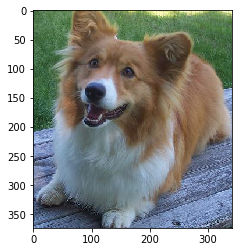

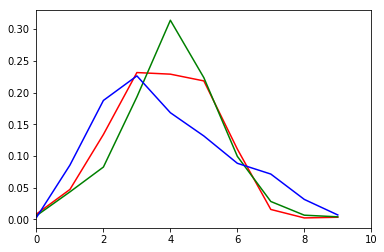

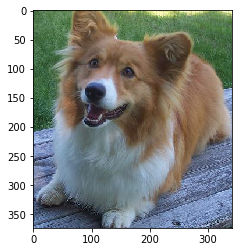

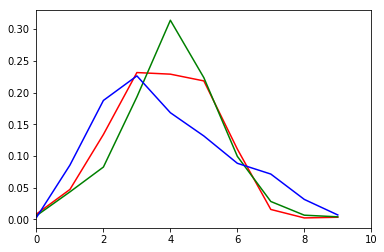

0                 1                 2                 3              \
          r     g     b     r     g     b     r     g     b     r     g     b   
19159 0.008 0.006 0.003 0.047 0.043 0.086 0.134 0.082 0.187 0.231 0.193 0.226   

          4                 5                 6                 7              \
          r     g     b     r     g     b     r     g     b     r     g     b   
19159 0.229 0.314 0.168 0.218 0.223 0.131 0.111 0.099 0.088 0.016 0.028 0.071   

          8                 9              
          r     g     b     r     g     b  
19159 0.002 0.007 0.031 0.003 0.004 0.007

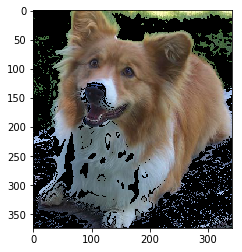

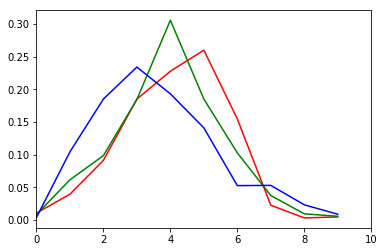

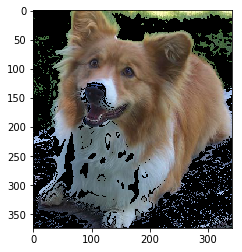

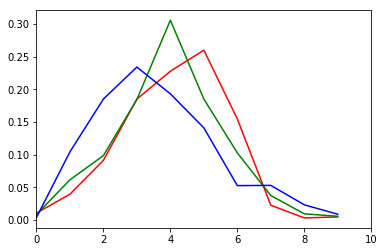

0                 1                 2                 3              \
          r     g     b     r     g     b     r     g     b     r     g     b   
19159 0.011 0.008 0.004 0.040 0.062 0.104 0.091 0.099 0.185 0.185 0.185 0.234   

          4                 5                 6                 7              \
          r     g     b     r     g     b     r     g     b     r     g     b   
19159 0.228 0.306 0.193 0.260 0.185 0.141 0.155 0.103 0.053 0.023 0.038 0.053   

          8                 9              
          r     g     b     r     g     b  
19159 0.003 0.010 0.023 0.005 0.006 0.009

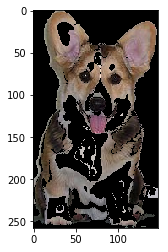

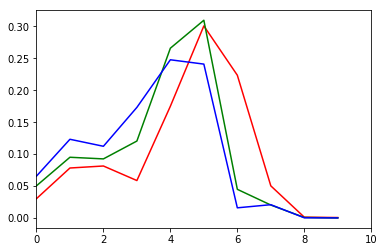

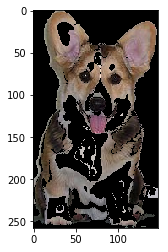

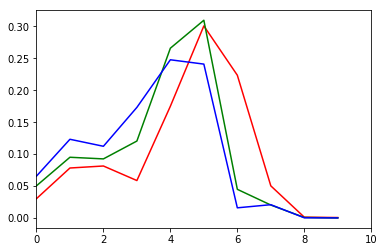

0                 1                 2                 3              \
          r     g     b     r     g     b     r     g     b     r     g     b   
19219 0.030 0.050 0.066 0.078 0.095 0.123 0.081 0.093 0.112 0.059 0.120 0.173   

          4                 5                 6                 7              \
          r     g     b     r     g     b     r     g     b     r     g     b   
19219 0.175 0.266 0.248 0.301 0.310 0.241 0.224 0.045 0.016 0.050 0.020 0.021   

          8                 9              
          r     g     b     r     g     b  
19219 0.001 0.001 0.000 0.001 0.000 0.000

In [16]:
def color_hist(x, display =False, img_type='masked_img'):
    img = cv2.imread(x[img_type], cv2.IMREAD_UNCHANGED) #IMREAD_UNCHANGED to keep 4th channel with transparency
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    #img = less_colors(img)
    if display:
        plt.imshow(img)
        plt.show()
    
    mask= cv2.inRange(img, np.array([0,0,0]),  np.array([0,0,0]))
    mask = ~mask
    nb_pixels = np.count_nonzero(mask)
    color = ('r','g','b')
    df = pd.DataFrame(index = color, columns =range(0,10))
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],mask,[10],[0,256])
        #normalize
        if nb_pixels>0:
            histr = histr/nb_pixels
        if display:
            plt.plot(histr,color = col)
            plt.xlim([0,10])
        
        df.loc[col]= histr.flatten()
    if display:
        plt.show()
    return (df.unstack().T)

df_sample=df[df.id=='n02113023_12248']
df_sample.apply(lambda x: color_hist(x, display =True, img_type='crop_img'),axis=1)
df_sample=df[df.id=='n02113023_12248']
df_sample.apply(lambda x: color_hist(x, display =True),axis=1)
df_sample=df[df.id=='n02113023_2992']
df_sample.apply(lambda x: color_hist(x, display =True),axis=1)

In [7]:
if True:
    df_color_hist=df[['masked_img']].swifter.apply(lambda x: color_hist(x),axis=1)

Pandas Apply: 100%|█████████████████████████████████████████████████████████████| 20580/20580 [02:33<00:00, 134.43it/s]


In [17]:
df_color_hist = df_color_hist.fillna(0)
X=df_color_hist
y=df['breed_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=y )

In [18]:
logreg = LogisticRegression(penalty  = 'l1')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print('Score of :',logreg.score(X_test, y_test))
print(classification_report(y_test, y_pred))

C:\Users\Maly-Fenix\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Maly-Fenix\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Score of : 0.05131195335276968


C:\Users\Maly-Fenix\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maly-Fenix\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maly-Fenix\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                                precision    recall  f1-score   support

                  Afghan_hound       0.02      0.08      0.03        60
           African_hunting_dog       0.17      0.14      0.15        42
                      Airedale       0.05      0.04      0.04        51
American_Staffordshire_terrier       0.00      0.00      0.00        41
                   Appenzeller       0.00      0.00      0.00        38
            Australian_terrier       0.02      0.02      0.02        49
            Bedlington_terrier       0.00      0.00      0.00        46
          Bernese_mountain_dog       0.09      0.44      0.15        54
              Blenheim_spaniel       0.08      0.15      0.11        47
                 Border_collie       0.33      0.05      0.09        37
                Border_terrier       0.00      0.00      0.00        43
                   Boston_bull       0.04      0.02      0.03        45
          Bouvier_des_Flandres       0.05      0.14      0.07  

Highest score is 0.0534045648276979 Hyperparam  n_estimators : 41
41
Highest score is 0.052052762794097186 Hyperparam  n_estimators : 42
42
Highest score is 0.053109612970219204 Hyperparam  n_estimators : 38
38


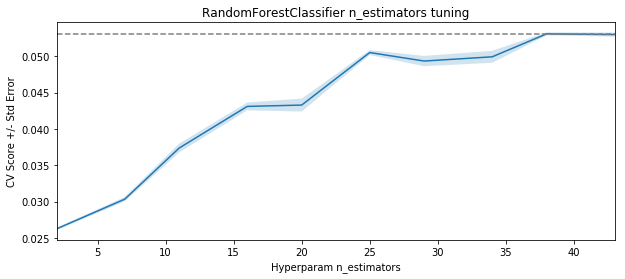

Highest score is 0.05515585072301447 Hyperparam  max_depth : 24
24
Highest score is 0.05418032524509898 Hyperparam  max_depth : 22
22


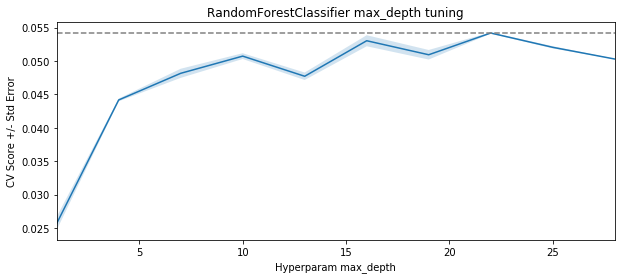

Highest score is 0.057384899498131886 Hyperparam  min_samples_split : 15
15
Highest score is 0.05651588113190426 Hyperparam  min_samples_split : 15
15


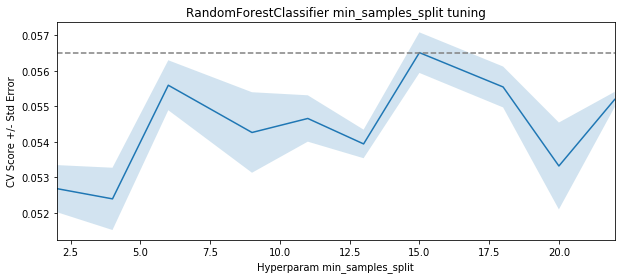

Highest score is 0.06171773798072564 Hyperparam  min_samples_leaf : 18
18
Highest score is 0.05967292517998074 Hyperparam  min_samples_leaf : 13
13


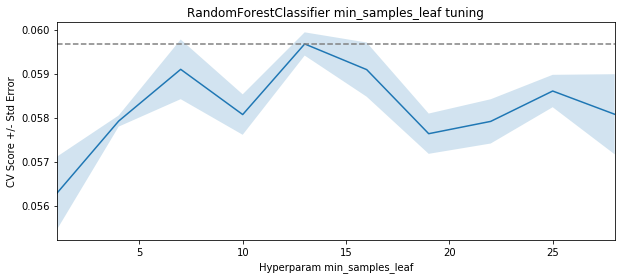

Score of : 0.062196307094266275


C:\Users\Maly-Fenix\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maly-Fenix\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maly-Fenix\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                                precision    recall  f1-score   support

                  Afghan_hound       0.07      0.10      0.08        60
           African_hunting_dog       0.11      0.10      0.10        42
                      Airedale       0.02      0.02      0.02        51
American_Staffordshire_terrier       0.00      0.00      0.00        41
                   Appenzeller       0.04      0.05      0.05        38
            Australian_terrier       0.05      0.06      0.05        49
            Bedlington_terrier       0.10      0.09      0.09        46
          Bernese_mountain_dog       0.13      0.30      0.18        54
              Blenheim_spaniel       0.04      0.15      0.06        47
                 Border_collie       0.06      0.05      0.05        37
                Border_terrier       0.03      0.02      0.03        43
                   Boston_bull       0.02      0.02      0.02        45
          Bouvier_des_Flandres       0.08      0.14      0.10  

In [12]:
rf = RandomForestClassifier()
rf.n_estimators = hyper_param(rf, X, y, 'n_estimators')
rf.max_depth = hyper_param(rf, X, y, 'max_depth')
rf.min_samples_split = hyper_param(rf, X, y, 'min_samples_split')
rf.min_samples_leaf = hyper_param(rf, X, y, 'min_samples_leaf')


silent = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print('Score of :',rf.score(X_test, y_test))
print(classification_report(y_test, y_pred))

In [19]:
all_breeds = df['breed_label'].unique()
three_breeds = ['Newfoundland',  'Pembroke', 'Samoyed']
twelve_breeds=['Newfoundland','giant_schnauzer', 'Maltese_dog', 'pembroke', 'Siberian_husky', 'Eskimo_dog','redbone', 'Chihuahua', 'African_hunting_dog', 'golden_retriever', 'cocker_spaniel', 'Samoyed']

# Delete Keras_small folder before reducing the set 
reduced_set = twelve_breeds

mask = df['breed_label'].isin(reduced_set)

X=df_color_hist.loc[mask]
y=df.loc[mask, 'breed_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=y )

Highest score is 0.31773331772684776 Hyperparam  n_estimators : 37
37
Highest score is 0.3156114071120721 Hyperparam  n_estimators : 38
38
Highest score is 0.2981373536623168 Hyperparam  n_estimators : 43
43
Highest score is 0.30794128029094425 Hyperparam  n_estimators : 35
35


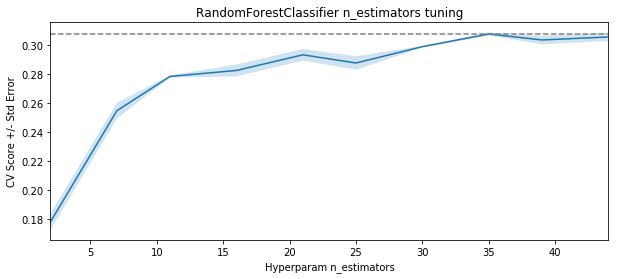

Highest score is 0.30742047220678476 Hyperparam  max_depth : 31
31
Highest score is 0.31000289088639615 Hyperparam  max_depth : 7
7


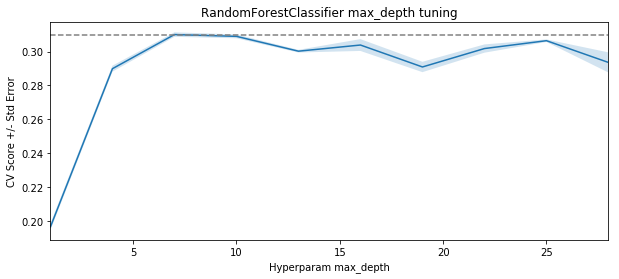

Highest score is 0.31983553590613006 Hyperparam  min_samples_split : 21
21
Highest score is 0.3203269190063338 Hyperparam  min_samples_split : 9
9


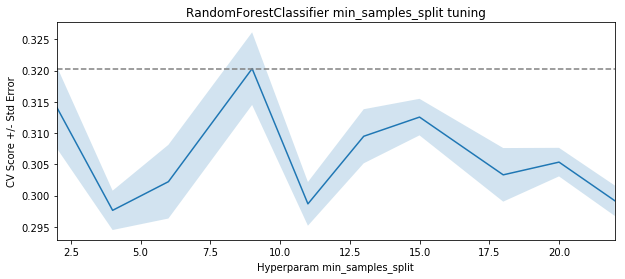

Highest score is 0.3161997224626174 Hyperparam  min_samples_leaf : 8
8
Highest score is 0.31053399064901166 Hyperparam  min_samples_leaf : 13
13
Highest score is 0.31261153952142773 Hyperparam  min_samples_leaf : 10
10


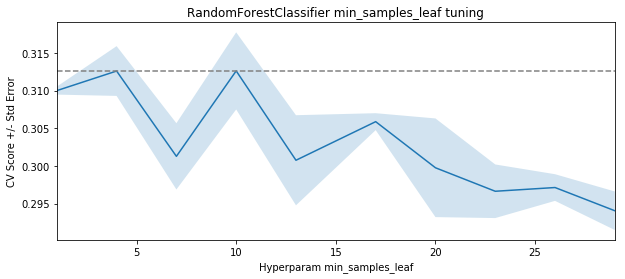

Score of : 0.31069958847736623
                     precision    recall  f1-score   support

African_hunting_dog       0.28      0.31      0.29        42
          Chihuahua       0.17      0.11      0.13        38
         Eskimo_dog       0.12      0.03      0.04        38
        Maltese_dog       0.30      0.49      0.38        63
       Newfoundland       0.43      0.49      0.46        49
            Samoyed       0.42      0.44      0.43        55
     Siberian_husky       0.31      0.31      0.31        48
     cocker_spaniel       1.00      0.03      0.05        40
    giant_schnauzer       0.29      0.26      0.27        39
   golden_retriever       0.18      0.24      0.21        37
            redbone       0.32      0.51      0.40        37

          micro avg       0.31      0.31      0.31       486
          macro avg       0.35      0.29      0.27       486
       weighted avg       0.35      0.31      0.28       486



In [20]:
rf = RandomForestClassifier()
rf.n_estimators = hyper_param(rf, X, y, 'n_estimators')
rf.max_depth = hyper_param(rf, X, y, 'max_depth')
rf.min_samples_split = hyper_param(rf, X, y, 'min_samples_split')
rf.min_samples_leaf = hyper_param(rf, X, y, 'min_samples_leaf')


silent = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print('Score of :',rf.score(X_test, y_test))
print(classification_report(y_test, y_pred))

In [21]:
all_breeds = df['breed_label'].unique()
three_breeds = ['Newfoundland',  'Pembroke', 'Samoyed']
twelve_breeds=['Newfoundland','giant_schnauzer', 'Maltese_dog', 'pembroke', 'Siberian_husky', 'Eskimo_dog','redbone', 'Chihuahua', 'African_hunting_dog', 'golden_retriever', 'cocker_spaniel', 'Samoyed']

# Delete Keras_small folder before reducing the set 
reduced_set = three_breeds

mask = df['breed_label'].isin(reduced_set)

X=df_color_hist.loc[mask]
y=df.loc[mask, 'breed_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=y )

Highest score is 0.8299461466693566 Hyperparam  n_estimators : 37
37
Highest score is 0.8333387871178347 Hyperparam  n_estimators : 24
24


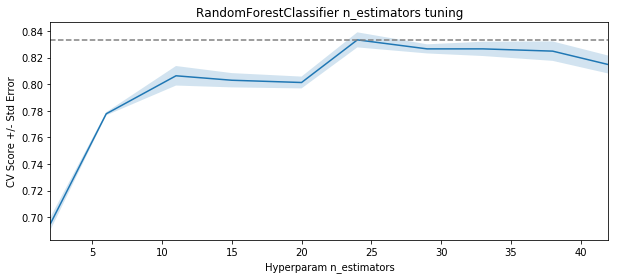

Highest score is 0.8367059622575782 Hyperparam  max_depth : 31
31
Highest score is 0.8299377727482721 Hyperparam  max_depth : 22
22


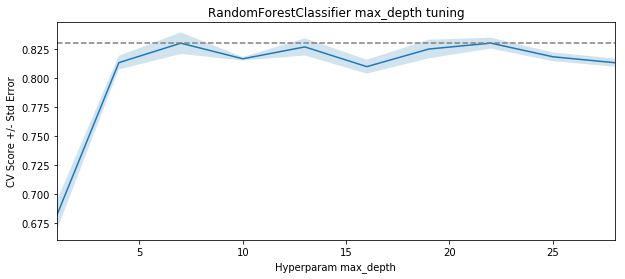

Highest score is 0.831664002900898 Hyperparam  min_samples_split : 6
6
Highest score is 0.831595723236669 Hyperparam  min_samples_split : 6
6


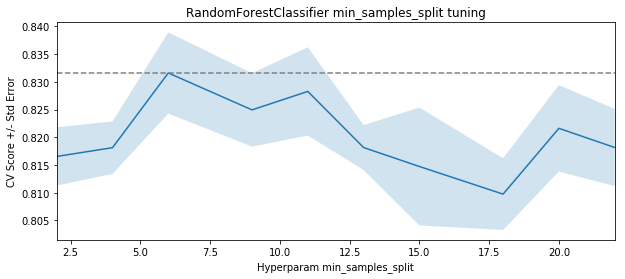

Highest score is 0.8231696691253357 Hyperparam  min_samples_leaf : 4
4
Highest score is 0.8215541894469527 Hyperparam  min_samples_leaf : 7
7
Highest score is 0.8181955600010341 Hyperparam  min_samples_leaf : 1
1


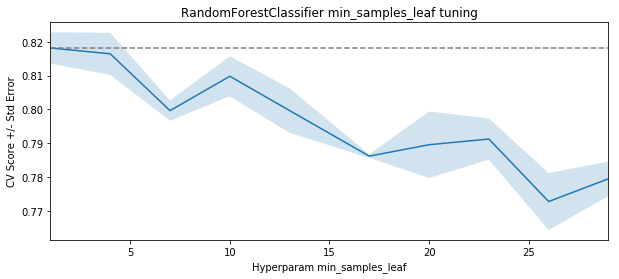

Score of : 0.7986577181208053
              precision    recall  f1-score   support

Newfoundland       0.81      0.80      0.80        49
    Pembroke       0.74      0.76      0.75        45
     Samoyed       0.84      0.84      0.84        55

   micro avg       0.80      0.80      0.80       149
   macro avg       0.80      0.80      0.80       149
weighted avg       0.80      0.80      0.80       149



In [22]:
rf = RandomForestClassifier()
rf.n_estimators = hyper_param(rf, X, y, 'n_estimators')
rf.max_depth = hyper_param(rf, X, y, 'max_depth')
rf.min_samples_split = hyper_param(rf, X, y, 'min_samples_split')
rf.min_samples_leaf = hyper_param(rf, X, y, 'min_samples_leaf')


silent = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print('Score of :',rf.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Confusion matrix, without normalization
[[39  6  4]
 [ 6 34  5]
 [ 3  6 46]]


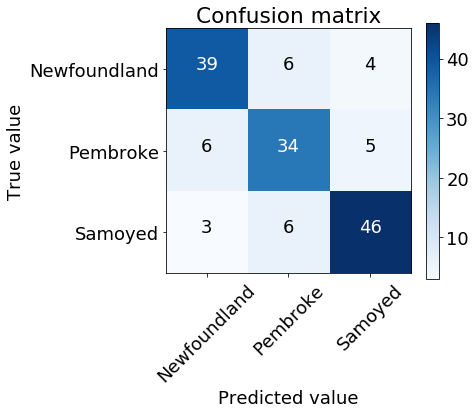

In [23]:
fig_size(7,7)
cm = confusion_matrix(y_test, y_pred, labels =reduced_set)
silent =plot_confusion_matrix(cm, reduced_set)

In [25]:
full_data_df = df

df_results = pd.DataFrame(np.vstack((y_pred, y_test.values)).T, columns =['predicted', 'true'], index = X_test.index)
labels = df_results['true'].unique()
my_query = '(true == "{0}" and predicted == "{1}") or (true =="{1}" and predicted =="{0}")'.format(labels[0], labels[-1])
df_worst_errors = df_results.query(my_query)
df_worst_errors = df_worst_errors.join(full_data_df).join(X)

C:\Users\Maly-Fenix\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


Pembroke predicted as Newfoundland


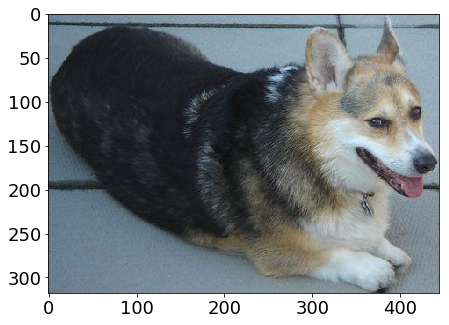

Pembroke predicted as Newfoundland


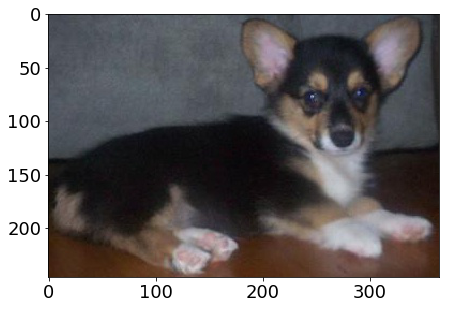

Newfoundland predicted as Pembroke


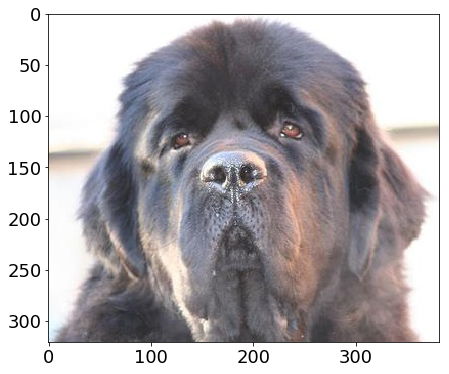

Newfoundland predicted as Pembroke


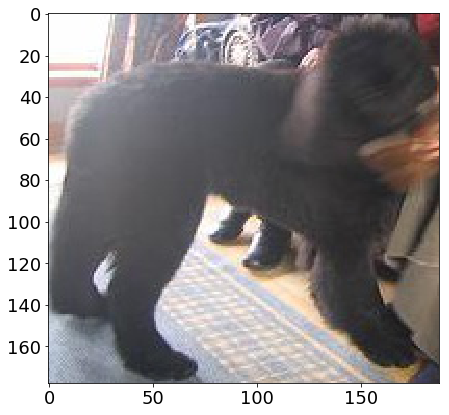

Newfoundland predicted as Pembroke


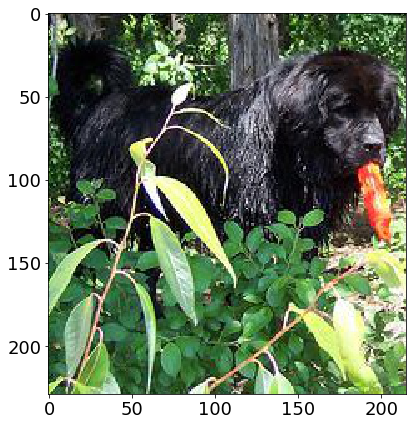

Pembroke predicted as Newfoundland


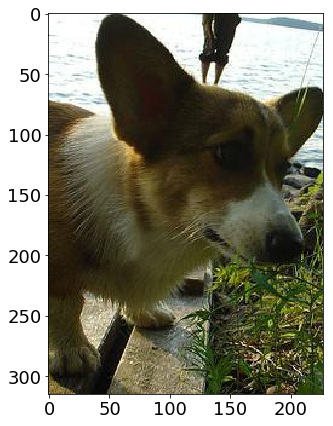

Newfoundland predicted as Pembroke


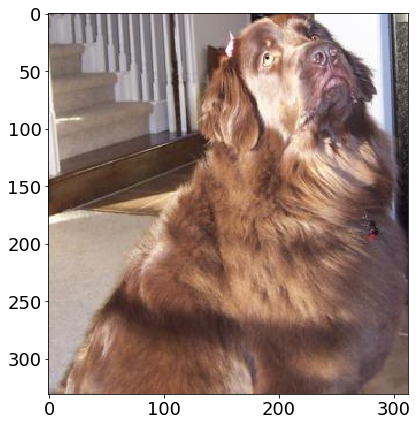

Pembroke predicted as Newfoundland


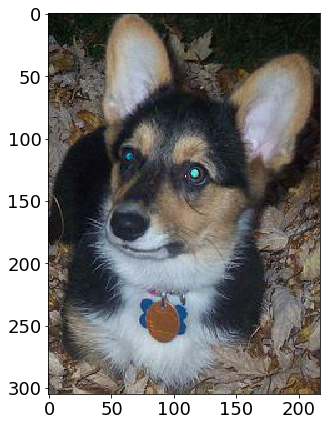

Newfoundland predicted as Pembroke


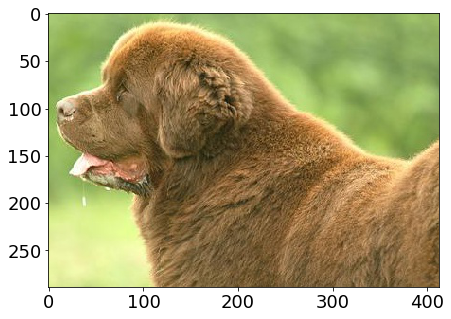

Pembroke predicted as Newfoundland


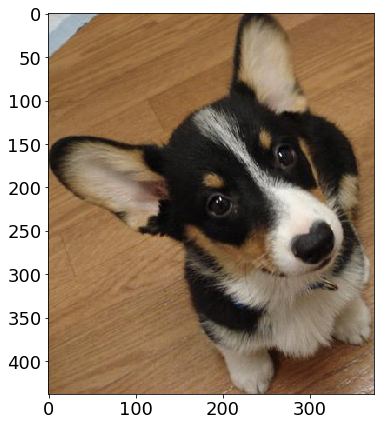

Newfoundland predicted as Pembroke


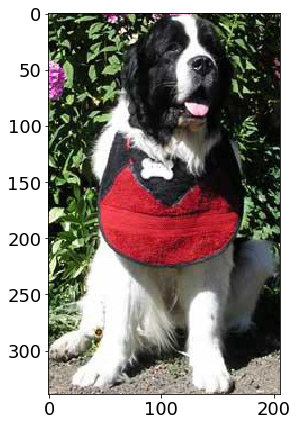

Pembroke predicted as Newfoundland


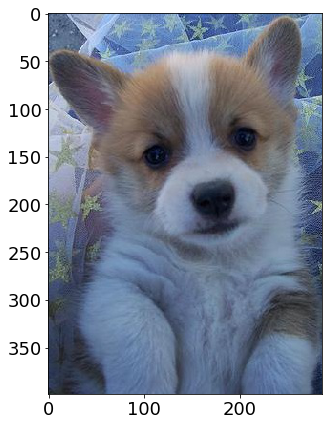

In [26]:
for index, row in df_worst_errors.iterrows() :
    print(row['true'], 'predicted as', row['predicted'])
    img = cv2.imread(row['crop_img'], cv2.IMREAD_UNCHANGED) #IMREAD_UNCHANGED to keep 4th channel with transparency
    imshow(img)